# Log-normal distribution of breakage function
The probability distribution of volume of particle size of $x$ produced by the breakage of particle size of $l$ is $P(x|l)$. Then
\begin{equation} \label{eq:prob}
\int_0^lP(x|l)dx=1
\end{equation}
This means sum of all particles' volume is same with the volume of original particle. Assuming that volume of original particle $l^3$ and that of broken particle $x^3$ the breakage function which is the number of particles produced by the breakage of original particle is
\begin{equation}
b(x,l)=\left(\frac{l}{x}\right)^3P(x|l)
\end{equation}
For mass or volume conservation, sum of all particle volumes generated by a particle of size $l$ should be $l^3$. That is
\begin{equation}
\int_0^lx^3b(x,l)dx=l^3
\end{equation}
which is just equivalent with eq. \ref{eq:prob}.\\
Deconvolution of particle size distribution (PSD) of activted sludge shows clear modes of log-normal distribution so that $\ln(L)\sim N(\mu,\sigma)$. Hence, the breakage function is
\begin{equation}
b(x,l)=\left(\frac{l}{x}\right)^3\frac{\frac{1}{x\sigma\sqrt{2\pi}}\exp\left(-\frac{\left(\ln x-\mu\right)^2}{2\sigma^2}\right)}{\frac{1}{2}\text{erfc}\left(-\frac{\ln l-\mu}{\sqrt{2}\sigma}\right)}
\end{equation}

# Selection function
Selection rate function by size dependent
\begin{equation}
S(l)=S_0l^p
\end{equation}
If $p=0$, the the selection function is size independent, $p=1,~2,~3$ indicates that the selection function is dependent on the length, area, and volume of particles, respectively.

Mimimum values of sum of squared errors (SSE) for each $p$ are given below 

|   p  |  0 |   1    |  2    |     3  |
|------|----|---------|-------|---    |
|   SSE |   0.047    | 0.021  | 0.015 |  0.014 |

Hence, it can be concluded that the selection function is dependent on the volume of particles.

In [16]:
import numpy as np

import pbm
import gn_ode
    
from data_import import importing
    
k0 = np.array([1e-7, 0.9, 0.05])
length, volume, number, Y0, mu, sigma, t, n, N, p, Q = importing(k0)
args = [length, mu, sigma, 3]

In [17]:
res_sd = gn_ode.gn_ode_bisection(pbm.phi, number, t, k0, Q, True, [1e-6, 1e-6, 100], *args)

get_fYHg: solve with parameters [1.e-07 9.e-01 5.e-02]
Iter | Obj func | step size | gradient 
    0|2.4725e-02|  3.756e-01|  9.06e+04
gn_ode: current step is [ 8.58654689e-08 -3.05769726e-01  2.18077677e-01]
doing bisection
get_fYHg_stepwise: solve with parameters [1.85865469e-07 5.94230274e-01 2.68077677e-01]
bisection done with mu=1.0 and 1 function evaluations.
Iter | Obj func | step size | gradient 
    1|1.5468e-02|  7.037e-02|  2.56e+04
gn_ode: current step is [ 5.91070858e-08  5.57247870e-02 -4.29763869e-02]
doing bisection
get_fYHg_stepwise: solve with parameters [2.44972555e-07 6.49955061e-01 2.25101290e-01]
bisection done with mu=1.0 and 1 function evaluations.
Iter | Obj func | step size | gradient 
    2|1.4255e-02|  7.868e-04|  4.47e+03
gn_ode: current step is [ 2.11523013e-08 -6.83804431e-04 -3.89140697e-04]
doing bisection
get_fYHg_stepwise: solve with parameters [2.66124856e-07 6.49271256e-01 2.24712149e-01]
bisection done with mu=1.0 and 1 function evaluations.
Iter |

In [18]:
np.savetxt("res_sizedependent.csv", res_sd[1])

In [19]:
res_sd

[array([2.68517472e-07, 6.49856613e-01, 2.24167522e-01]),
 array([[ 2.02904200e-03,  3.66257524e-01,  4.24177201e-01,
          4.66133926e-01,  5.19138558e-01,  5.54916690e-01],
        [ 3.27427040e-03,  3.99797726e-02,  4.58150905e-02,
          5.00408217e-02,  5.53758989e-02,  5.89736844e-02],
        [ 4.64727514e-03,  5.33384641e-02,  6.10764987e-02,
          6.66778143e-02,  7.37438565e-02,  7.85031438e-02],
        [ 6.30416170e-03,  7.51991338e-02,  8.61430748e-02,
          9.40609253e-02,  1.04038967e-01,  1.10749197e-01],
        [ 8.60062026e-03,  1.11104376e-01,  1.27379958e-01,
          1.39149225e-01,  1.53965833e-01,  1.63914844e-01],
        [ 1.16224000e-02,  1.63739191e-01,  1.87884050e-01,
          2.05336789e-01,  2.27290945e-01,  2.42014917e-01],
        [ 1.52026801e-02,  2.31510942e-01,  2.65836575e-01,
          2.90641529e-01,  3.21827150e-01,  3.42725106e-01],
        [ 1.89941311e-02,  3.06265850e-01,  3.51845788e-01,
          3.84777795e-01,  4.261666

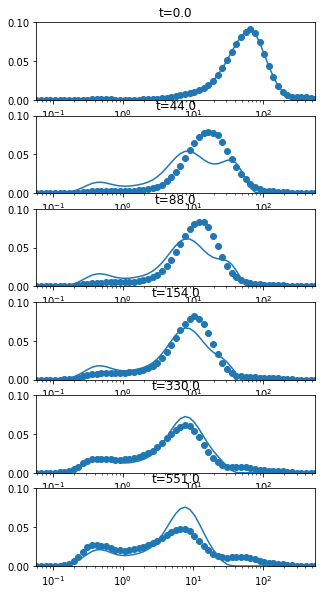

In [6]:
import matplotlib.pyplot as plt
import numpy as np

V = np.empty(np.shape(res[1]))
for i in range(6):
    V[:,i] = np.multiply(res[1][:,i], length**3)
fig, axes = plt.subplots(6,1,figsize=(5,10))
for i in range(6):
    axes[i].plot(length,V[:,i])
    axes[i].scatter(length,volume[:,i])
    axes[i].set_xscale('log')
    axes[i].set_xlim([length[0],length[-1]])
    axes[i].set_ylim([0, 0.1])
    axes[i].title.set_text('t={0}'.format(t[i]))

In [1]:
import numpy as np

import pbm
import gn_ode
    
from data_import import importing
    
k0 = np.array([1e-7, 0.9, 0.05])
length, volume, number, Y0, mu, sigma, t, n, N, p, Q = importing(k0)
args = [length, mu, sigma, 3]

In [2]:
res = gn_ode.gn_ode_bisection(pbm.phi, number, t, k0, Q, True, [1e-6, 1e-6, 100], *args)

get_fYHg: solve with parameters [1.e-07 9.e-01 5.e-02]
Iter | Obj func | step size | gradient 
    0|2.4725e-02|  3.756e-01|  9.06e+04
gn_ode: current step is [ 8.58654689e-08 -3.05769726e-01  2.18077677e-01]
doing bisection
get_fYHg_stepwise: solve with parameters [1.85865469e-07 5.94230274e-01 2.68077677e-01]
bisection done with mu=1.0 and 1 function evaluations.
Iter | Obj func | step size | gradient 
    1|1.5468e-02|  7.037e-02|  2.56e+04
gn_ode: current step is [ 5.91070858e-08  5.57247870e-02 -4.29763869e-02]
doing bisection
get_fYHg_stepwise: solve with parameters [2.44972555e-07 6.49955061e-01 2.25101290e-01]
bisection done with mu=1.0 and 1 function evaluations.
Iter | Obj func | step size | gradient 
    2|1.4255e-02|  7.868e-04|  4.47e+03
gn_ode: current step is [ 2.11523013e-08 -6.83804431e-04 -3.89140697e-04]
doing bisection
get_fYHg_stepwise: solve with parameters [2.66124856e-07 6.49271256e-01 2.24712149e-01]
bisection done with mu=1.0 and 1 function evaluations.
Iter |

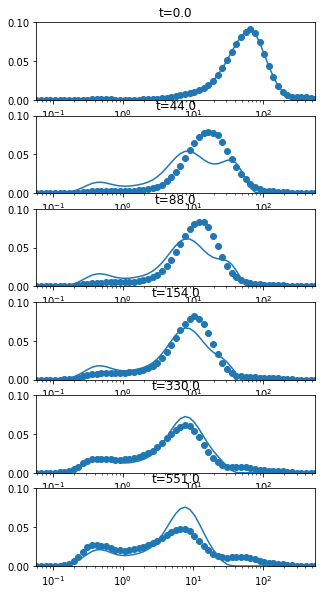

In [4]:
import matplotlib.pyplot as plt
import numpy as np

V = np.empty(np.shape(res[1]))
for i in range(6):
    V[:,i] = np.multiply(res[1][:,i], length**3)
fig, axes = plt.subplots(6,1,figsize=(5,10))
for i in range(6):
    axes[i].plot(length,V[:,i])
    axes[i].scatter(length,volume[:,i])
    axes[i].set_xscale('log')
    axes[i].set_xlim([length[0],length[-1]])
    axes[i].set_ylim([0, 0.1])
    axes[i].title.set_text('t={0}'.format(t[i]))

In [2]:
import numpy as np

import pbm
import lm_ode
    
from data_import import importing
    
k0 = np.array([1e-7, 0.9, 0.05])
length, volume, number, Y0, mu, sigma, t, n, N, p, Q = importing(k0)
args = [length, mu, sigma, 3]

In [5]:
res_lm = lm_ode.lm_ode(pbm.phi, number, t, k0, Q, [1e-6, 1e-8, 1e-8, 100], *args)

get_fYHg: solve with parameters [1.e-07 9.e-01 5.e-02]
Iter | Obj func | step size | gradient |   mu   |   rho
    0|2.4725e-02|   Not cal |  Not cal | 2.0e+06| Not cal
get_fYHg: solve with parameters [1.46067139e-07 8.99999967e-01 4.99999902e-02]
    1|2.2339e-02|  5.737e-08|  2.46e+04| 6.6e+05| 4.2e+00
get_fYHg: solve with parameters [1.75953805e-07 8.99999859e-01 4.99999570e-02]
    2|2.1908e-02|  1.167e-07|  5.99e+03| 2.2e+05| 4.8e+00
get_fYHg: solve with parameters [1.87165218e-07 8.99999522e-01 4.99998524e-02]
    3|2.1868e-02|  3.533e-07|  1.27e+03| 7.3e+04| 5.6e+00
get_fYHg: solve with parameters [1.89903328e-07 8.99998497e-01 4.99995335e-02]
    4|2.1866e-02|  1.074e-06|  2.48e+02| 2.4e+04| 5.1e+00
get_fYHg: solve with parameters [1.90457959e-07 8.99995411e-01 4.99985733e-02]
    5|2.1866e-02|  3.232e-06|  4.79e+01| 8.1e+03| 1.3e+00
get_fYHg: solve with parameters [1.90566751e-07 8.99986147e-01 4.99956913e-02]
    6|2.1865e-02|  9.702e-06|  1.02e+01| 2.7e+03| 1.0e+00
get_fYHg:

The macroflocs are broken down easily but it requires more enery to break microflocs. To model the difference between the macro and microflocs, selection rate dependent on partilce volume is not enough. To tackle this problem, critical length is introduced.

# Selection function with critical length

\begin{equation}
S(x) = \frac{S_0}{1+\exp\left[-k(x-x_c)\right]}
\end{equation}

In [7]:
import numpy as np

import pbm_critical
import gn_ode
import lm_ode
    
from data_import import importing
    
k0 = np.array([0.5, 6.4e-01, 2.2e-01, 0.2, 40.0])
length, volume, number, Y0, mu, sigma, t, n, N, p, Q = importing(k0)
args = [length, mu, sigma, 3]

In [9]:
res = gn_ode.gn_ode_bisection(pbm_critical.phi, number, t, k0, Q, True, [1e-4, 1e-4, 100], *args)

get_fYHg: solve with parameters [ 0.5   0.64  0.22  0.2  40.  ]
Iter | Obj func | step size | gradient 
    0|1.7882e-02|  6.293e+01|  7.32e-02
gn_ode: current step is [-8.00085985e+00 -9.94575150e-03  2.89179282e-02 -1.38906199e-01
 -6.24159110e+01]
doing bisection
get_fYHg_stepwise: solve with parameters [ 0.24997313  0.6396892   0.22090369  0.19565918 38.04950278]
bisection done with mu=0.03125 and 1 function evaluations.
Iter | Obj func | step size | gradient 
    1|1.6023e-02|  5.848e-01|  2.09e-02
gn_ode: current step is [-1.65544133e+00 -1.13200313e-02  2.96670276e-02 -1.34466152e-01
 -1.86403037e+01]
doing bisection
get_fYHg_stepwise: solve with parameters [ 0.04304296  0.63827419  0.22461206  0.17885091 35.71946482]
bisection done with mu=0.125 and 1 function evaluations.
Iter | Obj func | step size | gradient 
    2|1.2482e-02|  1.261e+00|  9.24e-02
gn_ode: current step is [ 0.01819025 -0.0767117   0.08793395 -0.11494955 10.08611034]
doing bisection
get_fYHg_stepwise: solve w

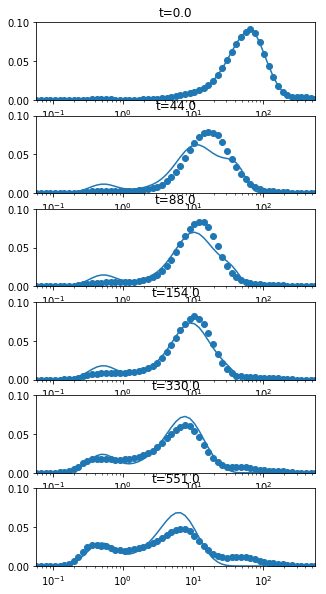

In [10]:
import matplotlib.pyplot as plt
import numpy as np

V = np.empty(np.shape(res[1]))
for i in range(6):
    V[:,i] = np.multiply(res[1][:,i], length**3)
fig, axes = plt.subplots(6,1,figsize=(5,10))
for i in range(6):
    axes[i].plot(length,V[:,i])
    axes[i].scatter(length,volume[:,i])
    axes[i].set_xscale('log')
    axes[i].set_xlim([length[0],length[-1]])
    axes[i].set_ylim([0, 0.1])
    axes[i].title.set_text('t={0}'.format(t[i]))

In [12]:
res

[array([1.54542348e-01, 6.88138159e-01, 2.04767439e-01, 6.57566833e-02,
        7.20512415e+01]),
 array([[ 2.02904200e-03,  2.17508943e-02,  4.40959214e-02,
          8.52830155e-02,  2.38946110e-01,  5.28663075e-01],
        [ 3.27427040e-03,  6.21688356e-03,  9.15691193e-03,
          1.44892996e-02,  3.43147801e-02,  7.19272318e-02],
        [ 4.64727514e-03,  9.74592365e-03,  1.40670668e-02,
          2.16635539e-02,  4.92889255e-02,  1.00895337e-01],
        [ 6.30416170e-03,  1.57964664e-02,  2.23617382e-02,
          3.33468431e-02,  7.17463550e-02,  1.41298921e-01],
        [ 8.60062026e-03,  2.68188270e-02,  3.71425204e-02,
          5.33725899e-02,  1.07117585e-01,  2.00285089e-01],
        [ 1.16224000e-02,  4.53620204e-02,  6.15366778e-02,
          8.53309801e-02,  1.59264606e-01,  2.80602546e-01],
        [ 1.52026801e-02,  7.33439441e-02,  9.78220228e-02,
          1.31627253e-01,  2.29861915e-01,  3.81442653e-01],
        [ 1.89941311e-02,  1.10733370e-01,  1.45697911e

In [15]:
np.savetxt("res_critical.csv", res[1])

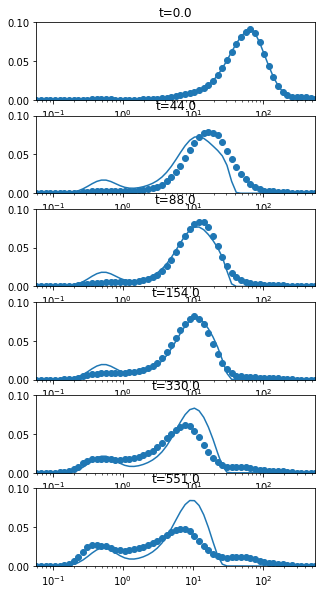

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from data_import import importing
from solve_ode import solve_jac
import pbm_critical


k0 = np.array([1.0, 6.4e-01, 2.2e-01, 0.2, 50.0])
length, volume, number, Y0, mu, sigma, t, n, N, p, Q = importing(k0)
args = [length, mu, sigma, 3]
Y, Jac = solve_jac(pbm_critical.phi, number, t, k0, n, p, N, False, 1e-8, *args)
V = np.empty(np.shape(Y))
for i in range(6):
    V[:,i] = np.multiply(Y[:,i], length**3)
fig, axes = plt.subplots(6,1,figsize=(5,10))
for i in range(6):
    axes[i].plot(length,V[:,i])
    axes[i].scatter(length,volume[:,i])
    axes[i].set_xscale('log')
    axes[i].set_xlim([length[0],length[-1]])
    axes[i].set_ylim([0, 0.1])
    axes[i].title.set_text('t={0}'.format(t[i]))
fig.show()

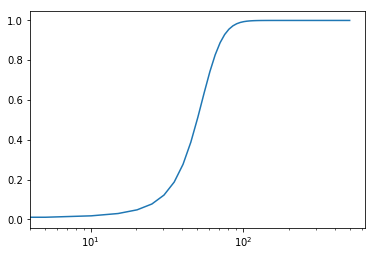

In [31]:
x = np.linspace(0, 500, 100)
def logi(x):
    return 1 / (1 + np.exp(-0.1*(x-50.0)))
plt.plot(x, logi(x))
plt.xscale('log')

In [72]:
def test(x, k):
    temp1 = k[0] * x**3
    temp2 = k[1] / (1 + np.exp(-k[2] * (x - k[3])))
    return temp1 + temp2

In [87]:
k = np.array([2.6e-07, 10, 0.5, 50.0])

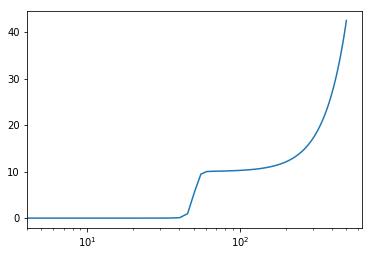

In [88]:
plt.plot(x, test(x, k))
plt.xscale('log')

In [71]:
k[0] * 500**3

32.5